In [1]:
import numpy as np
from scipy.optimize import curve_fit, fsolve
from amid import AMID
import matplotlib.pyplot as plt

In [2]:
alphas = []
nalpha = 150
for i in np.arange(4, 600):
    g = lambda a: a/np.tan(a) - 1
    sol = fsolve(g, i)
    alphas.append(sol)
alphas = np.unique(np.around(alphas, 8))**2
alphas = alphas[:nalpha]

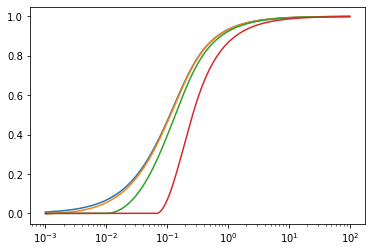

In [3]:
# Plot Atlung curve with various R_Ohm

R_Ohm = np.array([0.0, 1e-3, 1e-2, 1.0/15])
nQ = 1000
A = 3
B = 5
for i in range(len(R_Ohm)):
    Q_arr = np.logspace(-3, 2, nQ)
    tau_sol = np.zeros(nQ)
    tau_guess = 0.5
    for j in range(nQ):
        Q = Q_arr[j]
        func = lambda tau: tau - 1 + (1/(A*Q))*(1/B - 2*(np.sum(np.exp(-alphas*tau*Q)/alphas))) + R_Ohm[i]/Q if R_Ohm[i]<Q else tau 
        tau_sol[j] = fsolve(func, tau_guess, factor=1.)
    
    plt.semilogx(Q_arr, tau_sol)